In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

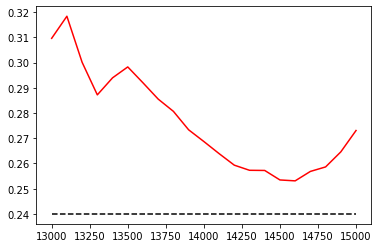

In [ ]:
def blscall(S,K,T,r,vol):
  d1 = (math.log(S/K)+(r+vol*vol/2)*T)/(vol*math.sqrt(T))
  d2 = d1-vol*math.sqrt(T)
  c = S*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)
  return c

def BisectionBLS(S,K,T,r,call):
  left = 1e-8
  right = 1
  threshold = 1e-8
  while right-left>=threshold:
    middle = (left+right)/2
    if(blscall(S,K,T,r,left)-call)*(blscall(S,K,T,r,middle)-call)<0:
      right = middle
    else:
      left = middle
  return (left+right)/2

price = [(13000 + i*100) for i in range(21)]
call = [675, 610 ,525, 448, 395, 345, 289, 238, 194, 153, 120, 92, 69, 52, 39.5, 28, 20.5, 16, 12, 9.8, 8.5]
put = [139, 163, 189, 221, 255, 291, 338, 388, 439, 505, 565, 640, 730, 800, 900, 995, 1090, 1180, 1290, 1380, 1470]
ST = np.arange(13000, 15000)

T = 0.038
r = 0.0165
V = []
for i in range(len(price)):
  V.append(BisectionBLS(13552.46,price[i],T,r,call[i]))


plt.plot(price, V, 'r-', [13000, 15000], [0.24, 0.24], 'k--')
